In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plotting
import matplotlib.dates as mdates # represents dates
import seaborn as sns # for visualization

import os # accessing directory structure

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/food-price-index-may-2022/food-price-index-may-2022-index-numbers-csv.csv
/kaggle/input/food-price-index-may-2022/food-price-index-may-2022-weighted-average-prices-csv.csv


In [2]:
df = pd.read_csv("/kaggle/input/food-price-index-may-2022/food-price-index-may-2022-index-numbers-csv.csv")
df.head()

,Series_reference,Period,Data_value,STATUS,UNITS,Subject,Group,Series_title_1
0,CPIM.SE901,1960.01,45.923461,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand,Food
1,CPIM.SE901,1960.02,45.498637,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand,Food
2,CPIM.SE901,1960.03,45.116296,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand,Food
3,CPIM.SE901,1960.04,45.158779,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand,Food
4,CPIM.SE901,1960.05,45.286226,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand,Food


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12276 entries, 0 to 12275
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Series_reference  12276 non-null  object 
 1   Period            12276 non-null  float64
 2   Data_value        12273 non-null  float64
 3   STATUS            12276 non-null  object 
 4   UNITS             12276 non-null  object 
 5   Subject           12276 non-null  object 
 6   Group             12276 non-null  object 
 7   Series_title_1    12276 non-null  object 
dtypes: float64(2), object(6)
memory usage: 767.4+ KB


In [4]:
df['Period'] = pd.to_datetime(df['Period'].astype(str), format='%Y.%m') # convert date datatype from float to datetime
df.head()

,Series_reference,Period,Data_value,STATUS,UNITS,Subject,Group,Series_title_1
0,CPIM.SE901,1960-01-01,45.923461,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand,Food
1,CPIM.SE901,1960-02-01,45.498637,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand,Food
2,CPIM.SE901,1960-03-01,45.116296,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand,Food
3,CPIM.SE901,1960-04-01,45.158779,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand,Food
4,CPIM.SE901,1960-05-01,45.286226,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand,Food


In [5]:
df.isna().sum() # Returns number of missing values

Series_reference    0
Period              0
Data_value          3
STATUS              0
UNITS               0
Subject             0
Group               0
Series_title_1      0
dtype: int64

In [6]:
df.rename(columns={'Period': 'Date', 'Data_value': 'Price', 'Series_title_1': 'food_item'}, inplace=True) # updated column names for better clarity
df.head()

,Series_reference,Date,Price,STATUS,UNITS,Subject,Group,food_item
0,CPIM.SE901,1960-01-01,45.923461,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand,Food
1,CPIM.SE901,1960-02-01,45.498637,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand,Food
2,CPIM.SE901,1960-03-01,45.116296,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand,Food
3,CPIM.SE901,1960-04-01,45.158779,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand,Food
4,CPIM.SE901,1960-05-01,45.286226,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand,Food


In [7]:
df['PercentChange'] = round(df['Price'].pct_change(),2) # Adding new column Percent Change for monthly change in price
df.head()

,Series_reference,Date,Price,STATUS,UNITS,Subject,Group,food_item,PercentChange
0,CPIM.SE901,1960-01-01,45.923461,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand,Food,NaN
1,CPIM.SE901,1960-02-01,45.498637,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand,Food,-0.01
2,CPIM.SE901,1960-03-01,45.116296,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand,Food,-0.01
3,CPIM.SE901,1960-04-01,45.158779,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand,Food,0.00
4,CPIM.SE901,1960-05-01,45.286226,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand,Food,0.00


In [8]:
df.set_index('Date')

,Series_reference,Price,STATUS,UNITS,Subject,Group,food_item,PercentChange
Date,,,,,,,,
1960-01-01,CPIM.SE901,45.923461,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand,Food,NaN
1960-02-01,CPIM.SE901,45.498637,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand,Food,-0.01
1960-03-01,CPIM.SE901,45.116296,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand,Food,-0.01
1960-04-01,CPIM.SE901,45.158779,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand,Food,0.00
1960-05-01,CPIM.SE901,45.286226,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand,Food,0.00
...,...,...,...,...,...,...,...,...
2022-01-01,CPIM.SE901502,1186.000000,FINAL,Index,Consumers Price Index - CPI,Food Price Index Level 3 Classes for New Zealand,Ready-to-eat food,0.00
2022-02-01,CPIM.SE901502,1193.000000,FINAL,Index,Consumers Price Index - CPI,Food Price Index Level 3 Classes for New Zealand,Ready-to-eat food,0.01
2022-03-01,CPIM.SE901502,1198.000000,FINAL,Index,Consumers Price Index - CPI,Food Price Index Level 3 Classes for New Zealand,Ready-to-eat food,0.00


In [9]:
# Top_10 food categories

by_food_category = df.food_item.value_counts()
top_10_food_items = by_food_category[:10]
top_10_food_items

Food                                                  749
Meat, poultry and fish                                677
Poultry (fresh, chilled or frozen)                    521
Fish and other seafood                                521
Restaurant meals                                      521
Beef and veal (fresh, chilled or frozen)              401
Pork (fresh, chilled or frozen)                       401
Mutton, lamb and hogget (fresh, chilled or frozen)    401
Preserved, prepared and processed meat                401
Eggs                                                  401
Name: food_item, dtype: int64

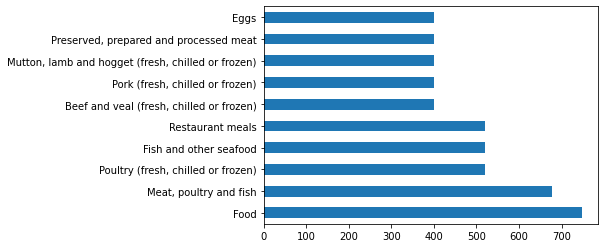

In [10]:
#.plot() in pandas

top_10_food_items.plot(kind='barh');

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


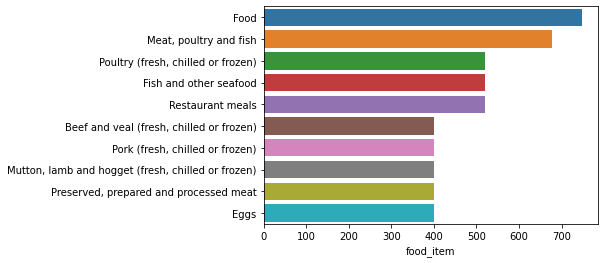

In [11]:
sns.barplot(top_10_food_items, top_10_food_items.index);

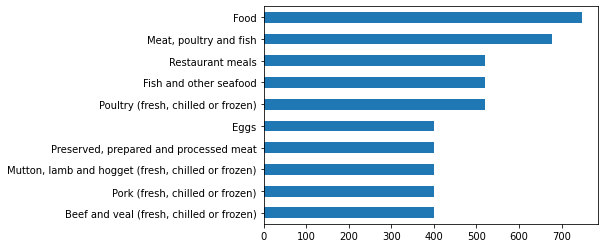

In [12]:
top_10_food_items_r = top_10_food_items.sort_values(ascending=True)
top_10_food_items_r.plot(kind='barh');

In [13]:
FruitVegetables = df.loc[df.food_item == 'Fruit and vegetables'].sort_values('PercentChange', ascending = False)
FruitVegetables.head()

,Series_reference,Date,Price,STATUS,UNITS,Subject,Group,food_item,PercentChange
869,CPIM.SE9011,2009-06-01,840.301576,FINAL,Index,Consumers Price Index - CPI,Food Price Index Level 2 Subgroups for New Zea...,Fruit and vegetables,0.15
917,CPIM.SE9011,2013-06-01,901.987663,FINAL,Index,Consumers Price Index - CPI,Food Price Index Level 2 Subgroups for New Zea...,Fruit and vegetables,0.13
756,CPIM.SE9011,2000-01-01,585.332420,FINAL,Index,Consumers Price Index - CPI,Food Price Index Level 2 Subgroups for New Zea...,Fruit and vegetables,0.13
893,CPIM.SE9011,2011-06-01,882.796436,FINAL,Index,Consumers Price Index - CPI,Food Price Index Level 2 Subgroups for New Zea...,Fruit and vegetables,0.12
1020,CPIM.SE9011,2022-01-01,1079.000000,FINAL,Index,Consumers Price Index - CPI,Food Price Index Level 2 Subgroups for New Zea...,Fruit and vegetables,0.10


In [14]:
df['monthyear'] = pd.to_datetime(df['Date']).dt.to_period('M')
df.head()

,Series_reference,Date,Price,STATUS,UNITS,Subject,Group,food_item,PercentChange,monthyear
0,CPIM.SE901,1960-01-01,45.923461,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand,Food,NaN,1960-01
1,CPIM.SE901,1960-02-01,45.498637,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand,Food,-0.01,1960-02
2,CPIM.SE901,1960-03-01,45.116296,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand,Food,-0.01,1960-03
3,CPIM.SE901,1960-04-01,45.158779,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand,Food,0.00,1960-04
4,CPIM.SE901,1960-05-01,45.286226,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand,Food,0.00,1960-05


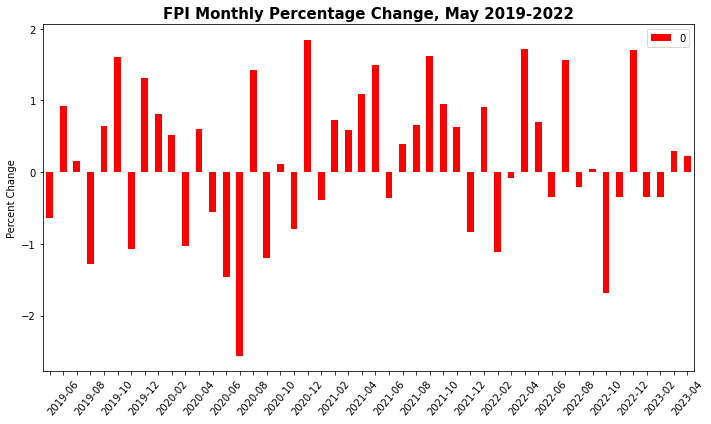

In [15]:
spacing = 2

rng = pd.date_range('2019-05-01', periods=48, freq='m')

blah = pd.DataFrame(data = np.random.randn(len(rng)), index=rng)

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)


blah_test = blah.copy()
str_index = []
for s_year,s_month in zip(blah.index.year.values,blah.index.month.values):
    string_day = '{}-{:02d}'.format(s_year,s_month)
    str_index.append(string_day)
blah_test.index = str_index

blah_test.plot(ax=ax, kind='bar', rot=50, color='red')

for label in ax.xaxis.get_ticklabels()[::spacing]:
    label.set_visible(False)
    
plt.title('FPI Monthly Percentage Change, May 2019-2022', fontsize=15, fontweight='bold')  
plt.ylabel('Percent Change', fontsize=10)

plt.tight_layout()

plt.show()

In [16]:
df2 = pd.read_csv("/kaggle/input/food-price-index-may-2022/food-price-index-may-2022-weighted-average-prices-csv.csv")
df2.head()

,Series_reference,Period,Data_value,STATUS,UNITS,Subject,Group,Series_title_1
0,CPIM.SAP0100,2006.06,3.11,FINAL,Dollars,Consumers Price Index - CPI,Food Price Index Selected Monthly Weighted Ave...,"Oranges, 1kg"
1,CPIM.SAP0100,2006.07,2.78,FINAL,Dollars,Consumers Price Index - CPI,Food Price Index Selected Monthly Weighted Ave...,"Oranges, 1kg"
2,CPIM.SAP0100,2006.08,2.43,FINAL,Dollars,Consumers Price Index - CPI,Food Price Index Selected Monthly Weighted Ave...,"Oranges, 1kg"
3,CPIM.SAP0100,2006.09,2.42,FINAL,Dollars,Consumers Price Index - CPI,Food Price Index Selected Monthly Weighted Ave...,"Oranges, 1kg"
4,CPIM.SAP0100,2006.10,3.04,FINAL,Dollars,Consumers Price Index - CPI,Food Price Index Selected Monthly Weighted Ave...,"Oranges, 1kg"


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27203 entries, 0 to 27202
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Series_reference  27203 non-null  object 
 1   Period            27203 non-null  float64
 2   Data_value        27121 non-null  float64
 3   STATUS            27203 non-null  object 
 4   UNITS             27203 non-null  object 
 5   Subject           27203 non-null  object 
 6   Group             27203 non-null  object 
 7   Series_title_1    27203 non-null  object 
dtypes: float64(2), object(6)
memory usage: 1.7+ MB


In [18]:
df2['Period'] = pd.to_datetime(df2['Period'].astype(str), format='%Y.%m') # convert date datatype from float to datetime
df2.head()

,Series_reference,Period,Data_value,STATUS,UNITS,Subject,Group,Series_title_1
0,CPIM.SAP0100,2006-06-01,3.11,FINAL,Dollars,Consumers Price Index - CPI,Food Price Index Selected Monthly Weighted Ave...,"Oranges, 1kg"
1,CPIM.SAP0100,2006-07-01,2.78,FINAL,Dollars,Consumers Price Index - CPI,Food Price Index Selected Monthly Weighted Ave...,"Oranges, 1kg"
2,CPIM.SAP0100,2006-08-01,2.43,FINAL,Dollars,Consumers Price Index - CPI,Food Price Index Selected Monthly Weighted Ave...,"Oranges, 1kg"
3,CPIM.SAP0100,2006-09-01,2.42,FINAL,Dollars,Consumers Price Index - CPI,Food Price Index Selected Monthly Weighted Ave...,"Oranges, 1kg"
4,CPIM.SAP0100,2006-01-01,3.04,FINAL,Dollars,Consumers Price Index - CPI,Food Price Index Selected Monthly Weighted Ave...,"Oranges, 1kg"


In [19]:
df2['Series_title_1'].value_counts()

Oranges, 1kg                                                   192
Milk - standard homogenised, 2 litres                          192
Cheese - mild cheddar (supermarket only), 1kg                  192
Eggs, dozen                                                    192
Butter - salted, 500g                                          192
                                                              ... 
Chicken pieces (excluding breast), boneless or bone in, 1kg     95
Salad, leaf, packaged, 150g                                     95
Fresh herbs, packaged, chilled                                  56
Olives, jar, 400g                                               56
Tea bags, flavoured or herbal, box of 25                        56
Name: Series_title_1, Length: 155, dtype: int64

In [20]:
df2['Monthly_PercentChange'] = round(df2['Data_value'].pct_change(),2) # Adding new column Percent Change for monthly change in price
df2.head()

,Series_reference,Period,Data_value,STATUS,UNITS,Subject,Group,Series_title_1,Monthly_PercentChange
0,CPIM.SAP0100,2006-06-01,3.11,FINAL,Dollars,Consumers Price Index - CPI,Food Price Index Selected Monthly Weighted Ave...,"Oranges, 1kg",NaN
1,CPIM.SAP0100,2006-07-01,2.78,FINAL,Dollars,Consumers Price Index - CPI,Food Price Index Selected Monthly Weighted Ave...,"Oranges, 1kg",-0.11
2,CPIM.SAP0100,2006-08-01,2.43,FINAL,Dollars,Consumers Price Index - CPI,Food Price Index Selected Monthly Weighted Ave...,"Oranges, 1kg",-0.13
3,CPIM.SAP0100,2006-09-01,2.42,FINAL,Dollars,Consumers Price Index - CPI,Food Price Index Selected Monthly Weighted Ave...,"Oranges, 1kg",-0.00
4,CPIM.SAP0100,2006-01-01,3.04,FINAL,Dollars,Consumers Price Index - CPI,Food Price Index Selected Monthly Weighted Ave...,"Oranges, 1kg",0.26


In [21]:
by_food_category = df2.Series_title_1.value_counts()
top_10_Series_title_1 = by_food_category[:10]
top_10_Series_title_1

Oranges, 1kg                                     192
Milk - standard homogenised, 2 litres            192
Cheese - mild cheddar (supermarket only), 1kg    192
Eggs, dozen                                      192
Butter - salted, 500g                            192
Sugar - white, 1.5kg                             192
Chocolate - block (supermarket only), 250g       192
Spaghetti - canned, 420g                         192
Coffee - instant, 100g                           192
Tea bags (supermarket only), box of 100          192
Name: Series_title_1, dtype: int64

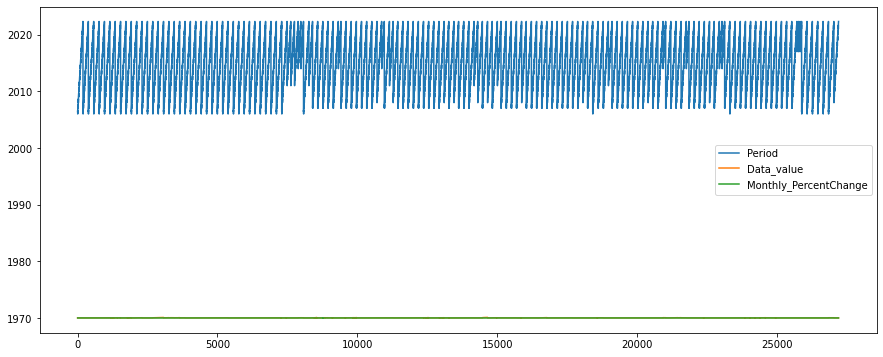

In [22]:
df2.plot(figsize=(15, 6))
plt.show()